# Assignment 2

The Spectral Mixture covariance kernel is able to approximate any desired stationary covariance function. This property of the SM kernel has sparked research in using Bayesian inference with the SM kernel for pattern discovery and extrapolation. Consider the sinc 

Consider the sinc function:

\begin{equation*}
sinc(x) = sin(\pi x)/(\pi x)
\end{equation*}

If we define an ojective function as follows,

\begin{equation*}
y(x) = sinc(x+10) + sinc(x) + sinc(x-10)
\end{equation*}

and evaluate the function on \[-15,15\], then we get the following complex oscilatory pattern:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from numpy.linalg import inv
from sklearn.metrics.pairwise import euclidean_distances

%matplotlib inline

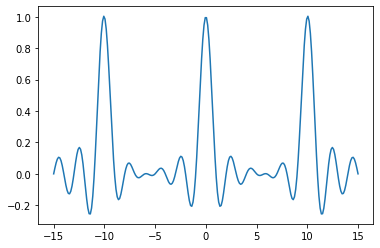

In [3]:
def sinc(x):
    return np.sin(np.pi * x) / (np.pi * x)

def objective(x):
    return sinc(x+10) + sinc(x) + sinc(x-10)

pts = 250
X = np.linspace(-15,15,pts) # value locations
y = objective(X) # objective function

plt.plot(X,y)

Now imagine we did not have data for the objective values on the range \[-4.5, 4.5\], then our graph would look like this:

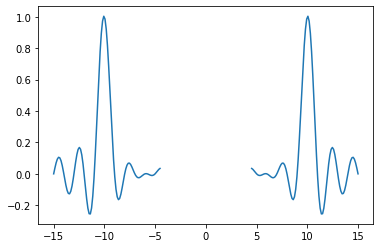

In [13]:
D = X[X<=-4.5]
unk = X[X>-4.5]

known = np.where(np.logical_or(X<=-4.5, X>=4.5), X, np.nan)
plt.plot(X, objective(known))

It is extremely difficult for a human to infer what the missing portion might be from only this graph, so in turn it is very hard to encode initial assumptions into a Gaussian prior by selecting mean/covariance functions. In this problem, we will use the SM kernel to discover the missing data. To do this, we train the SM kernel hyperparameters (weights, means, and covariances of each kernel in the mixture) by using nolinear conjugate gradient to optimize the marginal likelihood of the data given the hyperparameters. Once our SM kernel is trained, we can use it along with our known data to sample the posterior predictive distribution and derive the missing data. What follows is skeleton code for this process. It is your job to fill in the missing parts as they are described.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from numpy.linalg import inv
from sklearn.metrics.pairwise import euclidean_distances
from scipy.linalg import cho_solve, cho_factor

%matplotlib inline

def sinc(x):
    return np.sin(np.pi * x) / (np.pi * x)

def objective(x):
    return sinc(x+10) + sinc(x) + sinc(x-10)

pts = 250
X = np.linspace(-15,15,pts) # value locations
y = objective(X) # objective function

D = np.concatenate([X[X<=-4.5], X[X>=4.5]]) # value locations we know
unk = X[np.logical_and(X>-4.5, X<4.5)]

Q = 7 # number of kernels in sspectral mixture

Dvect = D.reshape(-1,1) # vector of known points
hyps = np.random.random(3 * Q) * 1e-8 # 1D-list of hyperparameters to be optimized
noise = .001 * np.eye(Dvect.shape[0]) # gaussian noise
knownData = objective(Dvect) # objective values at known points

"""
Define the spectral covariance function as defined in the book on page 48
"""
def kernSM(X1, X2, weights, means, covs):
    # Your code here
    return K


"""
Define the inference function

X: New input locations (n x d).
X_train: Training locations (m x d).
Y_train: Training targets (m x 1).

weights, means, covs: SM kernel hyperparameters (Q x 1)
"""

def predict(X, X_train, Y_train, weights, means, covs, kernFunc=kernSM):
    
    return mu, cov


"""
This function is complete. It calculates the marginal log likelihood of the data given the kernel hyperparameters.
This output of this function is optimized to obtain the optimal hyperparameters for the final kernel.
"""
def marginalLikelihood(hyps, objval, xInds, Q, sig):
    hyps = hyps.flatten()
        
    w = hyps[:Q].reshape(-1,1)
    m = hyps[Q:2*Q].reshape(-1,1)
    cov = hyps[2*Q:].reshape(-1,1)
    
    condMean, condKern = predict(xInds, xInds, objective(xInds),w, m, cov, kernSM)
    ml = - .5 * (objval - condMean).T @ inv(condKern + sig) @ (objval - condMean) - .5 * np.linalg.det(condKern + sig) - len(xInds)/2 * np.log(2*np.pi)
    return ml[0,0]

"""
Optimize marginal log likelihood using nonlinear conjugate gradients
"""
optHyps = optimize.fmin_cg(marginalLikelihood, hyps, args=(knownData, Dvect, Q, noise))

optw = optHyps[:Q].reshape(-1,1)
optm = optHyps[Q:2*Q].reshape(-1,1)
optcov = optHyps[2*Q:].reshape(-1,1)

"""
Finally, infer true mean from trained kernel and plot this mean against the true objective to see how well the prediction worked
"""
u_posterior, K_posterior = predict(unk.reshape(-1,1), Dvect, knownData, optw, optm, optcov, kernSM)
plt.plot(unk, u_posterior)
plt.plot(X, y)

How did you do? If you were unable to get a proper prediction, what do you think went wrong?